# **Import Libraries and modules**

In [1]:
!pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-ermfj31f
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-ermfj31f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8utfejvm/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [28]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from keras import backend as K
# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Load pre-shuffled MNIST data into train and test sets

In [3]:
!git clone https://github.com/raghakot/keras-vis

Cloning into 'keras-vis'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1662 (delta 11), reused 21 (delta 7), pack-reused 1631
Receiving objects: 100% (1662/1662), 150.19 MiB | 48.26 MiB/s, done.
Resolving deltas: 100% (882/882), done.


In [4]:
%cd keras-vis/examples/vggnet
!ls

/content/keras-vis/examples/vggnet
activation_maximization.ipynb  attention.ipynb	images


In [5]:
!wget -O main.jpg  https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg

--2019-07-15 15:20:05--  https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg
Resolving media.karousell.com (media.karousell.com)... 190.93.247.83, 190.93.246.83, 190.93.245.83, ...
Connecting to media.karousell.com (media.karousell.com)|190.93.247.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58670 (57K) [image/jpeg]
Saving to: ‘main.jpg’

main.jpg            100%[===================>]  57.29K  --.-KB/s    in 0.01s   

2019-07-15 15:20:05 (5.13 MB/s) - ‘main.jpg’ saved [58670/58670]



In [6]:
!ls

activation_maximization.ipynb  attention.ipynb	images	main.jpg


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
from keras.applications.vgg16 import preprocess_input

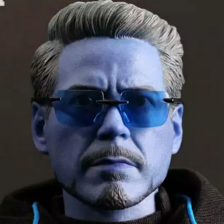

In [65]:
from vis.utils import utils
from matplotlib import pyplot as plt
from keras.preprocessing import image
import urllib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
%matplotlib inline
img1 = utils.load_img('main.jpg', target_size=(224, 224))
cv2_imshow(img1)


In [13]:
!pip install keract

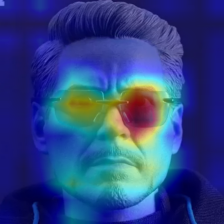

In [67]:
x = np.expand_dims(image.img_to_array(img1), axis=0)
img = np.copy(img1)
class_idx = 837
preds = model.predict(x)
preds = np.argmax(preds, axis=1)[0]

class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer('block5_conv3')
layer_out_channels = last_conv_layer.output_shape[-1]

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(layer_out_channels):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#heatmap = heatmap/255
cv2_imshow(overlay(heatmap, img2))
for i in range(len(heatmap)):
  for j in range(len(heatmap[0])):
    if heatmap[i][j][1]<=0.01 and heatmap[i][j][2]<=0.01:
      heatmap[i][j] = 0

img = (img - np.min(img))/(np.max(img)-np.min(img))
superimposed_img = 0.65*(img) + 0.35*heatmap
for i in range(len(heatmap)):
  for j in range(len(heatmap[0])):
    if np.sum(heatmap[i][j])==0:
      superimposed_img[i][j]=img[i][j]